### Performance Metrics Clustering-Silhouetter Coefficient

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


In [3]:
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

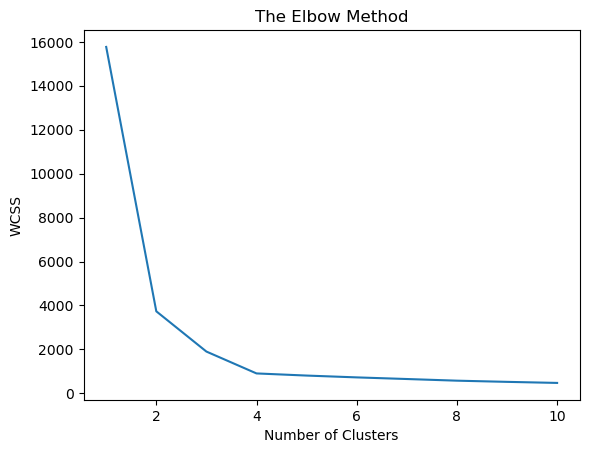

In [4]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [5]:
clusterer = KMeans(n_clusters=4, random_state=10)
cluster_labels = clusterer.fit_predict(X)
print(cluster_labels)

[3 3 0 1 2 1 2 2 2 2 3 3 2 1 2 3 2 3 1 2 0 0 2 1 2 2 1 1 0 2 3 1 2 3 2 3 0
 0 3 0 2 0 1 2 2 3 0 2 1 1 1 0 0 2 3 0 0 0 0 2 1 1 0 2 1 2 3 2 0 0 3 0 2 3
 2 2 3 2 2 0 1 1 0 1 1 0 0 1 0 0 1 3 0 2 1 3 3 2 3 1 1 3 1 0 1 2 2 1 1 0 2
 3 1 0 1 0 1 2 1 2 0 3 3 0 2 0 1 3 3 2 1 0 0 0 0 3 1 2 1 1 2 3 2 1 1 1 2 2
 3 3 0 0 1 3 1 0 0 0 0 0 0 0 0 0 1 3 3 3 2 1 3 0 2 3 1 0 0 0 0 3 2 0 1 3 3
 0 2 3 3 2 1 1 3 3 2 1 2 3 3 1 3 0 1 2 2 3 2 0 3 2 0 2 0 3 2 2 2 1 0 1 2 3
 0 2 0 0 0 1 0 1 3 0 3 0 1 1 0 3 1 3 2 0 3 3 3 3 2 0 3 0 2 1 1 2 2 1 0 2 0
 1 2 1 0 0 1 2 3 3 0 0 0 2 1 1 2 1 0 3 1 3 1 3 3 1 3 1 1 2 0 0 0 2 2 0 3 1
 3 3 3 2 0 2 3 0 3 3 0 3 3 0 1 3 2 2 1 1 0 3 1 1 2 3 1 1 2 0 1 0 2 3 3 1 0
 3 2 1 1 2 2 2 3 2 1 1 0 1 1 1 1 3 3 2 1 0 2 3 1 0 1 2 1 0 2 0 1 2 2 3 1 3
 3 3 3 3 3 0 3 1 3 1 1 0 1 2 0 0 3 1 0 1 2 3 0 0 3 0 0 1 1 3 0 2 1 2 2 3 3
 2 3 0 0 3 0 3 0 1 3 1 0 2 1 0 2 1 3 2 1 1 0 2 0 2 3 1 3 2 1 3 3 3 0 1 2 3
 2 2 0 0 3 2 2 2 2 2 2 3 2 0 3 2 1 2 1 2 0 0 1 1 1 0 2 0 3 0 1 2 3 1 3 1 3
 2 1 1 3 0 2 3 0 0 0 3 2 

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.5804620679044765
For n_clusters = 6 The average silhouette_score is : 0.4966479110816958


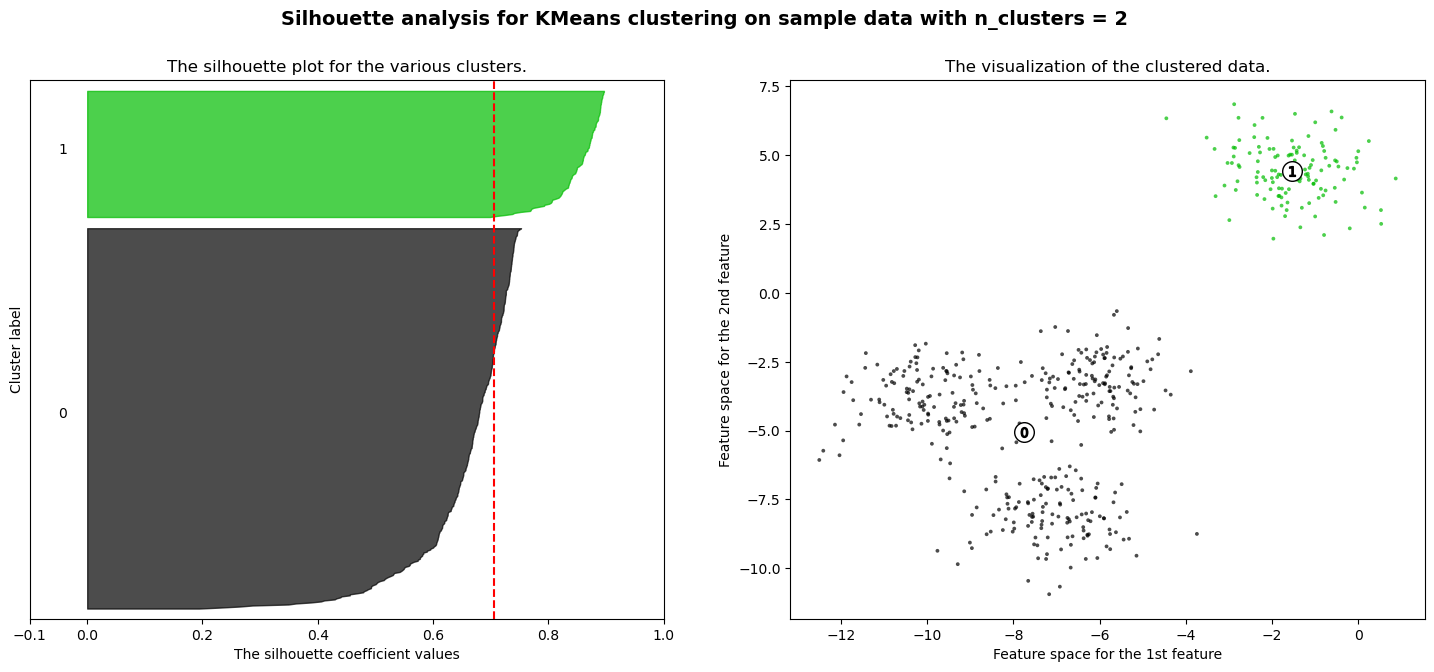

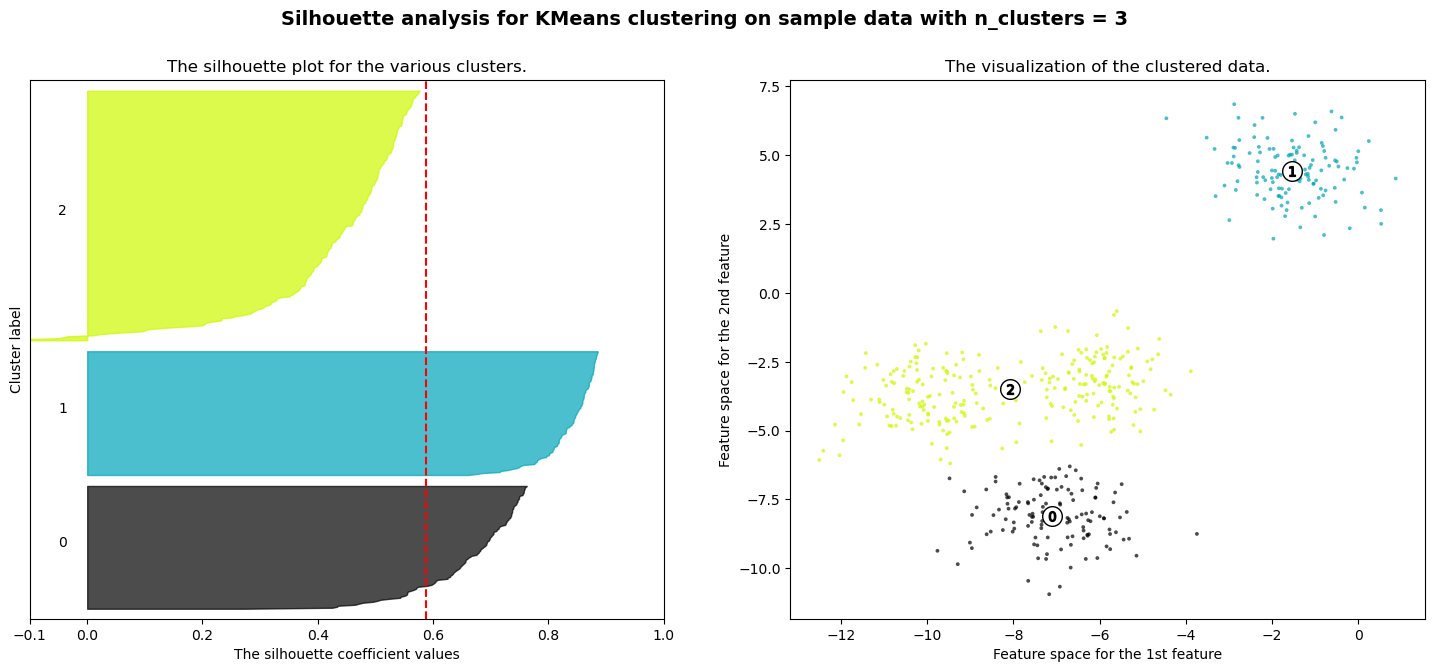

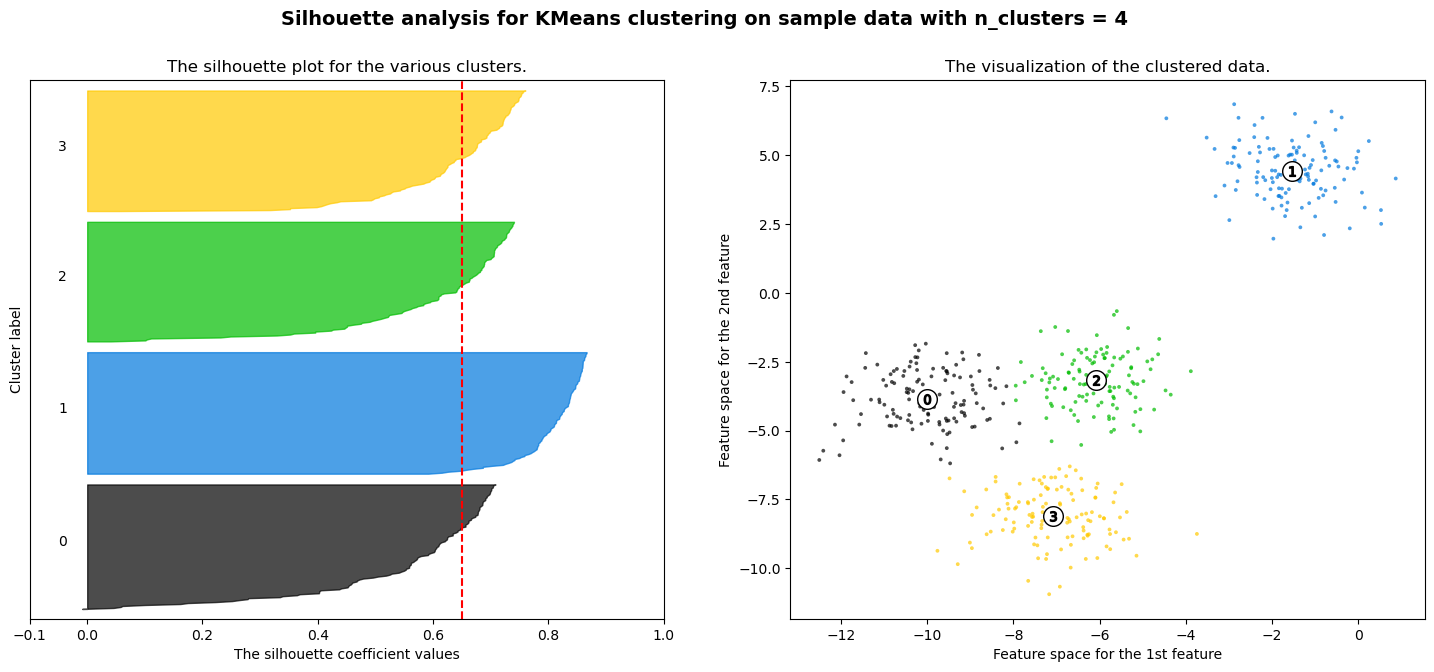

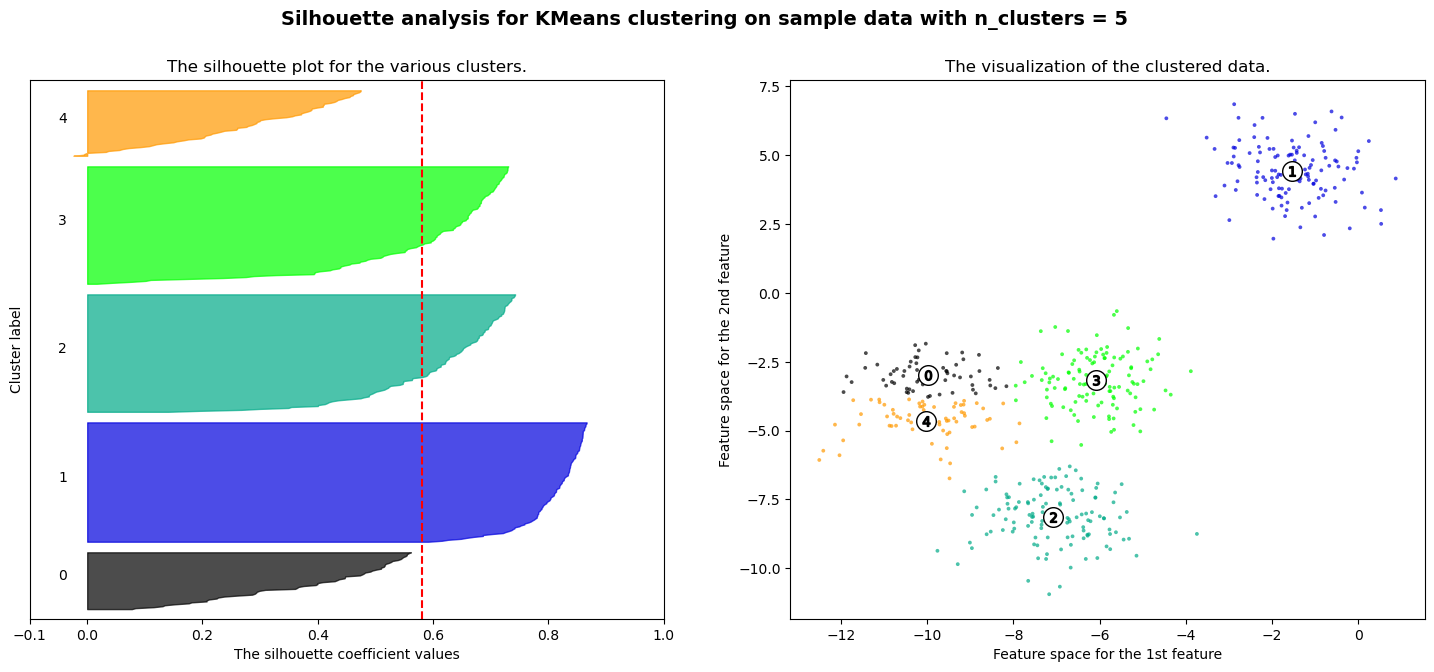

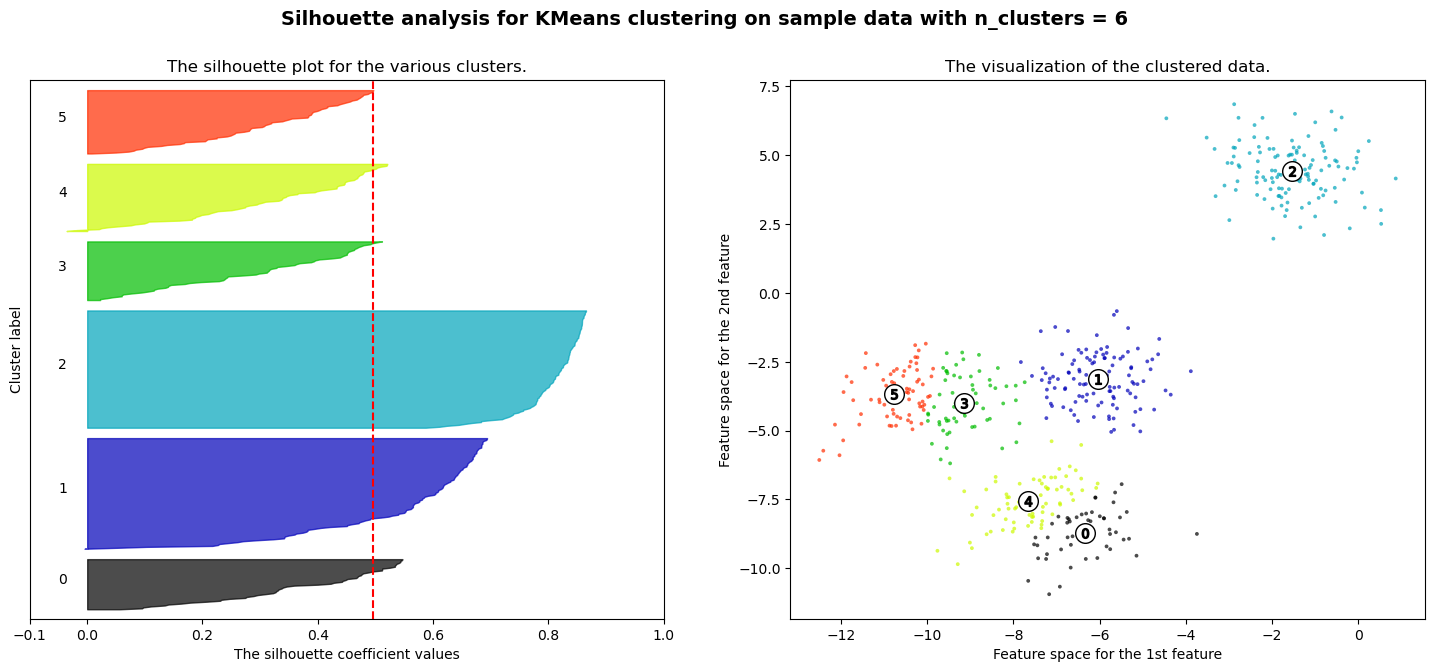

In [6]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

### ROC and AUC

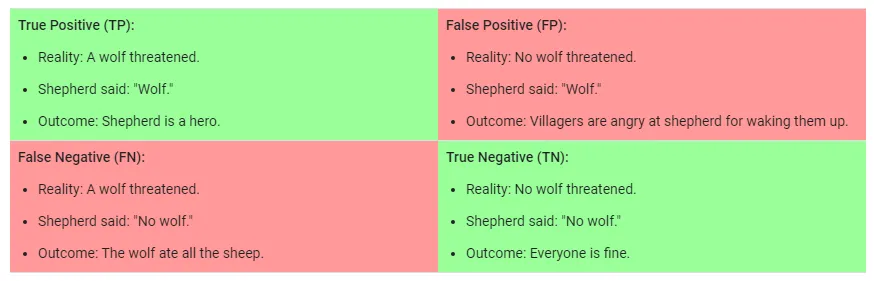

In [8]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')

data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [9]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [11]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [12]:
y_scores = model.predict_proba(X_test)[:,1]

In [13]:
y_scores

array([0.04954048, 0.17463103, 0.09362494, 0.25513324, 0.63551139,
       0.11672894, 0.06566172, 0.42202729, 0.04866387, 0.5757405 ,
       0.33868772, 0.4131109 , 0.69854382, 0.19962966, 0.02000869,
       0.82466571, 0.86664502, 0.03100988, 0.25513776, 0.89494177,
       0.95244022, 0.8347921 , 0.11743649, 0.44671338, 0.08924117,
       0.06882866, 0.65120702, 0.41190638, 0.17862901, 0.28691607,
       0.24550481, 0.4389403 , 0.00942476, 0.24260439, 0.35162013,
       0.96165193, 0.34362271, 0.8093203 , 0.29377522, 0.05083563,
       0.18185949, 0.08672851, 0.42230375, 0.18739682, 0.03010607,
       0.03949492, 0.24743391, 0.4277712 , 0.1052777 , 0.37967836,
       0.99354903, 0.10663243, 0.39097433, 0.76881335, 0.36862266,
       0.45766596, 0.95038267, 0.42002342, 0.39147755, 0.04376203,
       0.37281317, 0.90134926, 0.88182783, 0.88849631, 0.33087827,
       0.06929688, 0.95267725, 0.20048472, 0.26050846, 0.35461287,
       0.10356409, 0.08166642, 0.45048722, 0.09219043, 0.08650

In [14]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_scores)

In [15]:
thresholds

array([       inf, 0.99354903, 0.95267725, 0.95244022, 0.82466571,
       0.76881335, 0.7619538 , 0.68396247, 0.67547067, 0.67416151,
       0.65120702, 0.65071881, 0.63551139, 0.58632929, 0.5757405 ,
       0.56973419, 0.52524221, 0.47025554, 0.46119125, 0.45048722,
       0.4389403 , 0.43859857, 0.42230375, 0.42002342, 0.4131109 ,
       0.41190638, 0.40484818, 0.37967836, 0.36862266, 0.31018927,
       0.3087818 , 0.27776407, 0.2721283 , 0.25513776, 0.25513324,
       0.24743391, 0.24550481, 0.23672058, 0.22880508, 0.18185949,
       0.17862901, 0.17463103, 0.17325796, 0.14639817, 0.14077903,
       0.11672894, 0.11491751, 0.11000093, 0.10663243, 0.08924117,
       0.08672851, 0.02000869, 0.0192977 , 0.00160711])

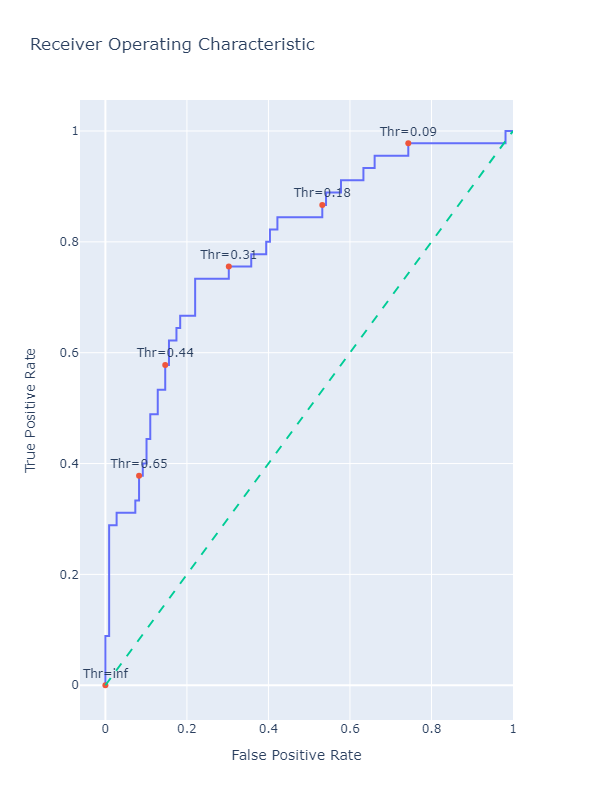

In [16]:
import plotly.graph_objects as go
import numpy as np


# Generate a trace for ROC curve
trace0 = go.Scatter(
    x=fpr,
    y=tpr,
    mode='lines',
    name='ROC curve'
)

# Only label every nth point to avoid cluttering
n = 10  
indices = np.arange(len(thresholds)) % n == 0  # Choose indices where index mod n is 0

trace1 = go.Scatter(
    x=fpr[indices], 
    y=tpr[indices], 
    mode='markers+text', 
    name='Threshold points', 
    text=[f"Thr={thr:.2f}" for thr in thresholds[indices]], 
    textposition='top center'
)


# Diagonal line
trace2 = go.Scatter(
    x=[0, 1], 
    y=[0, 1], 
    mode='lines', 
    name='Random (Area = 0.5)', 
    line=dict(dash='dash')
)

data = [trace0, trace1, trace2]

# Define layout with square aspect ratio
layout = go.Layout(
    title='Receiver Operating Characteristic',
    xaxis=dict(title='False Positive Rate'),
    yaxis=dict(title='True Positive Rate'),
    autosize=False,
    width=800,
    height=800,
    showlegend=False
)

# Define figure and add data
fig = go.Figure(data=data, layout=layout)

# Show figure
fig.show()


In [17]:
# Assume that fpr, tpr, thresholds have already been calculated
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold is:", optimal_threshold)

Optimal threshold is: 0.3686226616935556


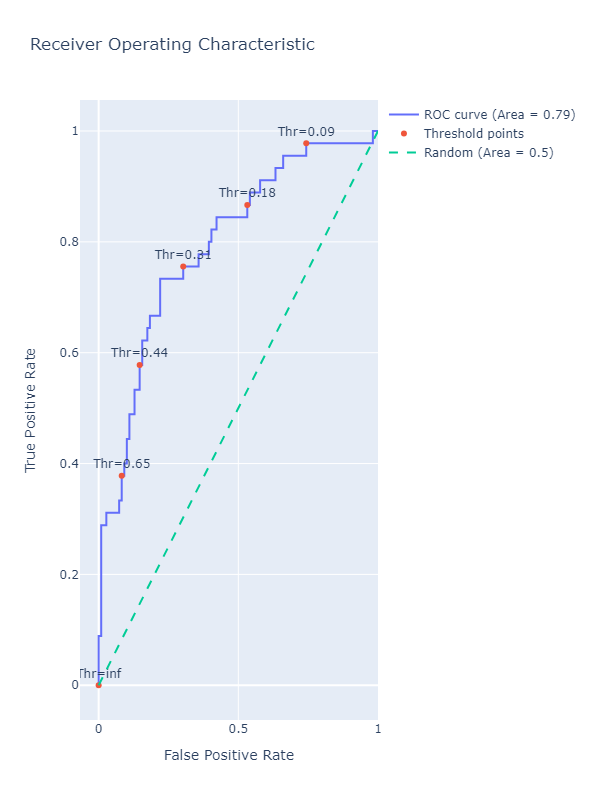

In [18]:
import plotly.graph_objects as go
import numpy as np
from sklearn.metrics import roc_auc_score

# Assuming fpr, tpr, thresholds are already calculated as before
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_scores)

# Generate a trace for ROC curve
trace0 = go.Scatter(
    x=fpr,
    y=tpr,
    mode='lines',
    name=f'ROC curve (Area = {roc_auc:.2f})'
)

# Only label every nth point to avoid cluttering
n = 10
indices = np.arange(len(thresholds)) % n == 0  # Choose indices where index mod n is 0

trace1 = go.Scatter(
    x=fpr[indices], 
    y=tpr[indices], 
    mode='markers+text', 
    name='Threshold points', 
    text=[f"Thr={thr:.2f}" for thr in thresholds[indices]], 
    textposition='top center'
)

# Diagonal line
trace2 = go.Scatter(
    x=[0, 1], 
    y=[0, 1], 
    mode='lines', 
    name='Random (Area = 0.5)', 
    line=dict(dash='dash')
)

data = [trace0, trace1, trace2]

# Define layout with square aspect ratio
layout = go.Layout(
    title='Receiver Operating Characteristic',
    xaxis=dict(title='False Positive Rate'),
    yaxis=dict(title='True Positive Rate'),
    autosize=False,
    width=800,
    height=800,
    showlegend=True
)

# Define figure and add data
fig = go.Figure(data=data, layout=layout)

# Show figure
fig.show()


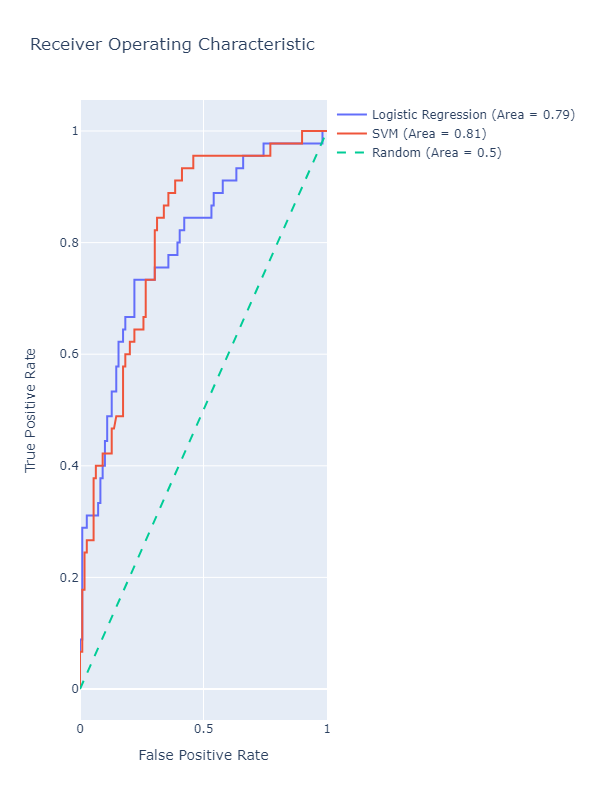

In [19]:
import numpy as np
import plotly.graph_objects as go
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Assuming that X_train, X_test, y_train, y_test are already defined

# SVM requires feature scaling for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_scores = lr_model.predict_proba(X_test)[:,1]

# SVM model
svm_model = SVC(probability=True)
svm_model.fit(X_train_scaled, y_train)
svm_scores = svm_model.predict_proba(X_test_scaled)[:,1]

# Generate ROC curve data for logistic regression model
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, lr_scores)
lr_auc = roc_auc_score(y_test, lr_scores)

# Generate ROC curve data for SVM model
svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test, svm_scores)
svm_auc = roc_auc_score(y_test, svm_scores)

# Generate a trace for the Logistic Regression ROC curve
trace0 = go.Scatter(
    x=lr_fpr,
    y=lr_tpr,
    mode='lines',
    name=f'Logistic Regression (Area = {lr_auc:.2f})'
)

# Generate a trace for the SVM ROC curve
trace1 = go.Scatter(
    x=svm_fpr,
    y=svm_tpr,
    mode='lines',
    name=f'SVM (Area = {svm_auc:.2f})'
)

# Diagonal line
trace2 = go.Scatter(
    x=[0, 1], 
    y=[0, 1], 
    mode='lines', 
    name='Random (Area = 0.5)', 
    line=dict(dash='dash')
)

data = [trace0, trace1, trace2]

# Define layout with square aspect ratio
layout = go.Layout(
    title='Receiver Operating Characteristic',
    xaxis=dict(title='False Positive Rate'),
    yaxis=dict(title='True Positive Rate'),
    autosize=False,
    width=800,
    height=800,
    showlegend=True
)

# Define figure and add data
fig = go.Figure(data=data, layout=layout)

# Show figure
fig.show()
